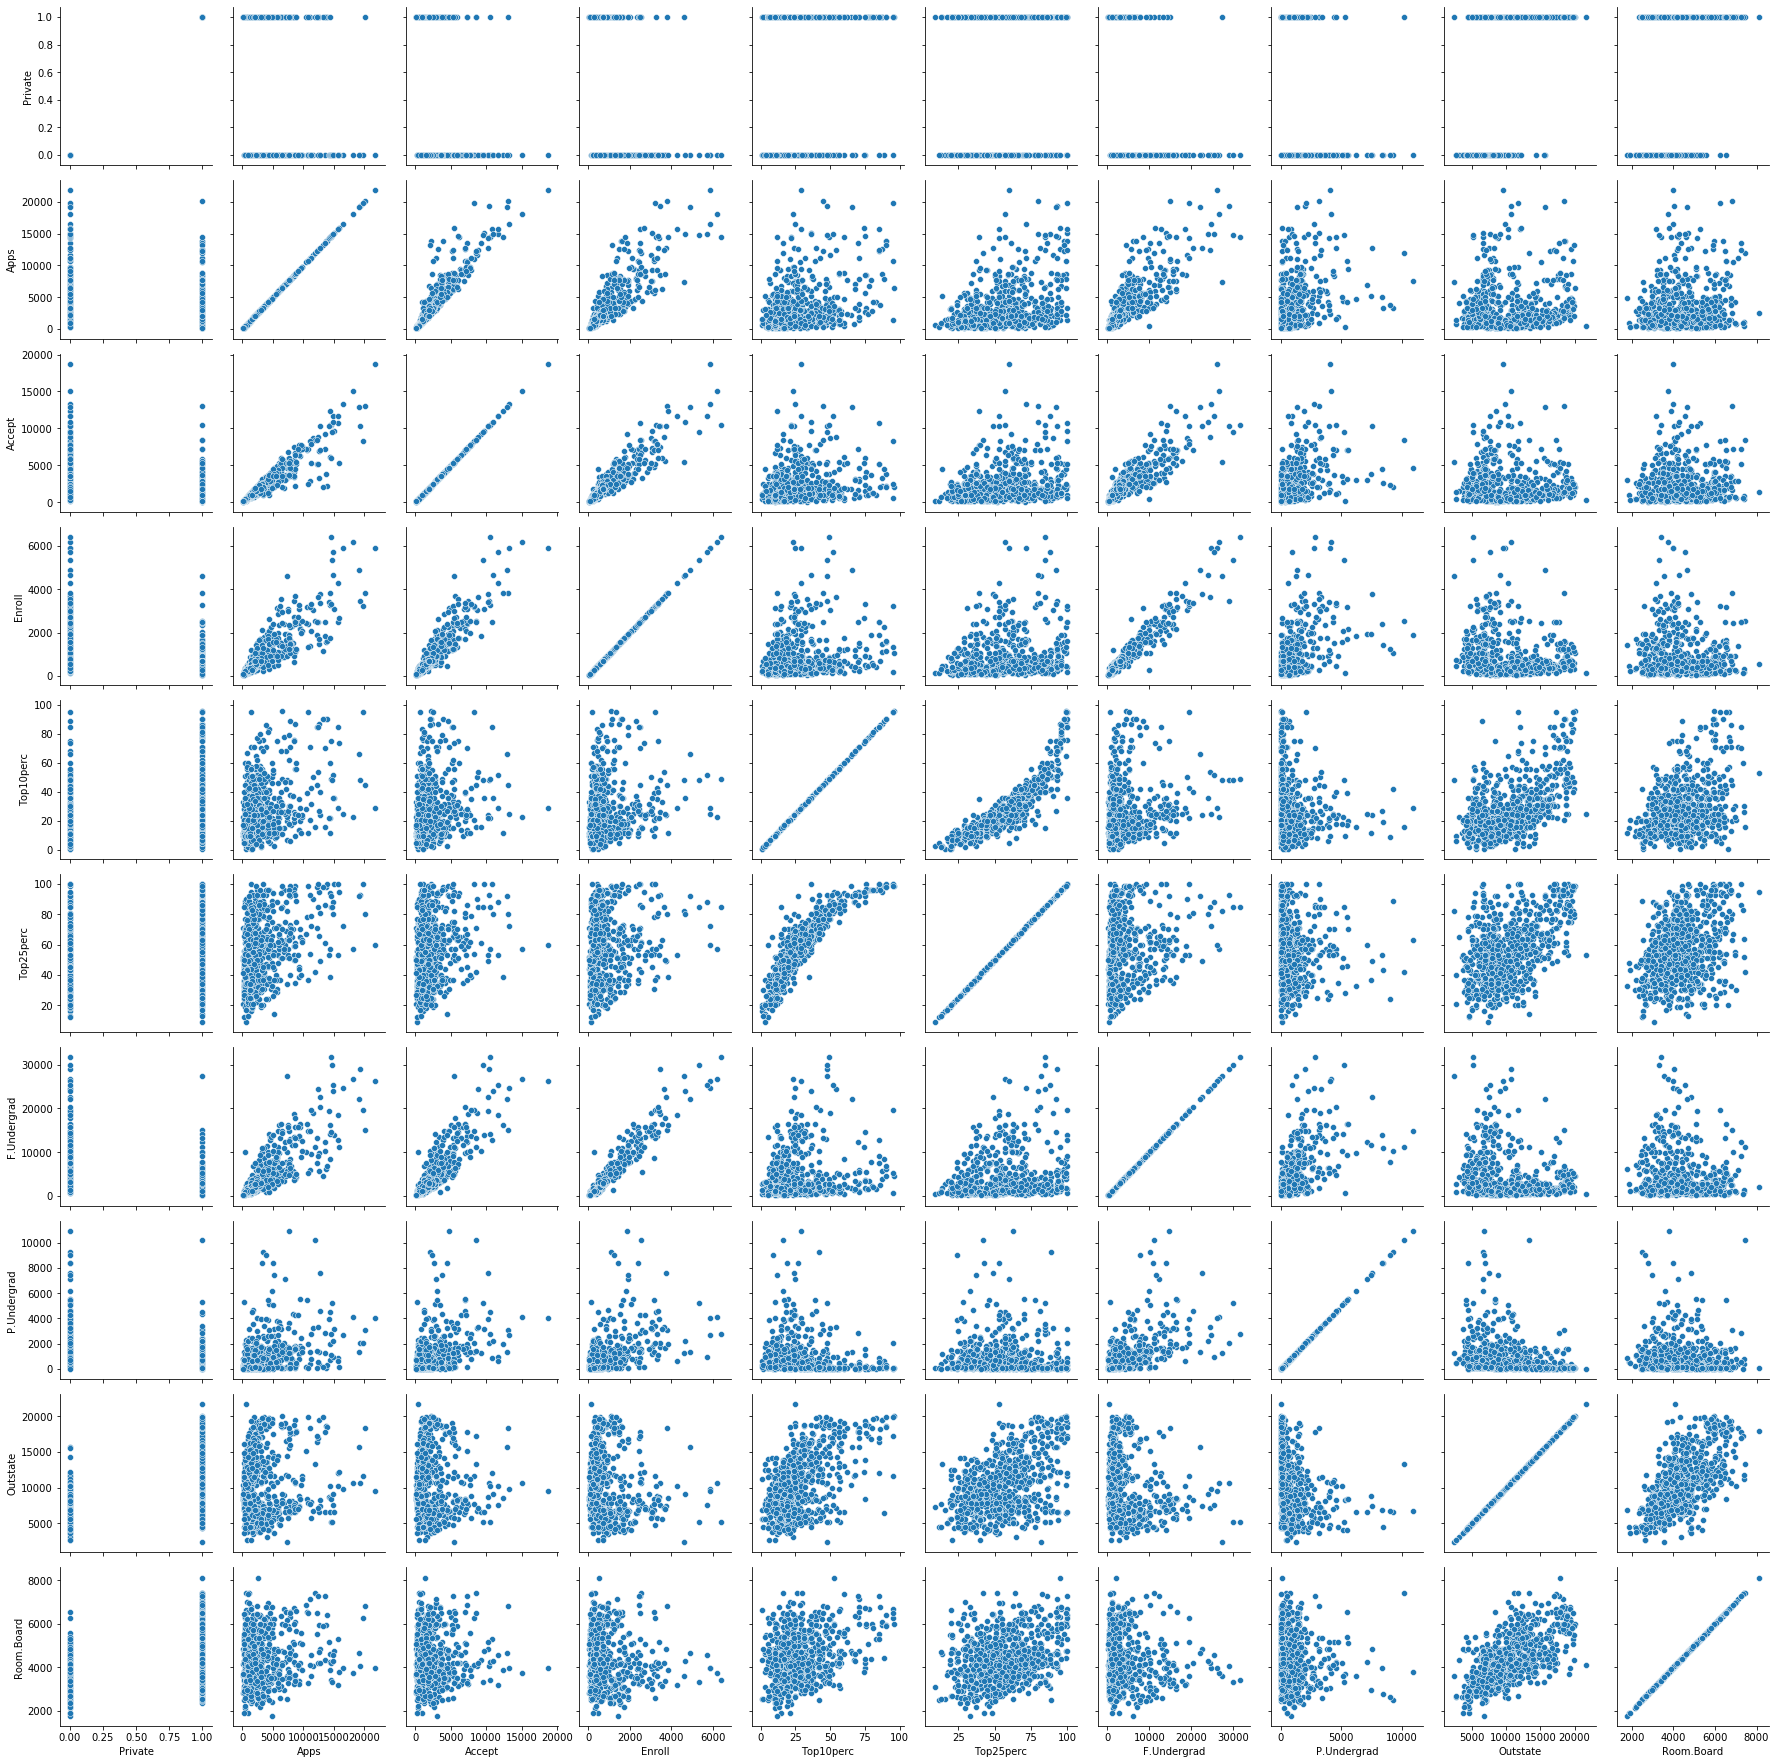

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression

college_ = pd.read_csv("College.csv", index_col=0)
college = college_.copy()
college = college.loc[college['Apps']<40000]
college = college.loc[college['P.Undergrad']<20000]
college.loc[college['Private'] == 'No', 'Private'] = int(0)
college.loc[college['Private'] == 'Yes', 'Private'] = int(1)

a = college.iloc[:,0:10]
g = sns.PairGrid(a)
g.map(sns.scatterplot)

In [11]:
#a)
X = college[college.columns.difference(['Apps'])]
y = college['Apps']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=4)

In [12]:
#b)
ols = LinearRegression().fit(X_train,y_train)
y_pred_ols = ols.predict(X_test)
mse_ols = np.mean((y_test - y_pred_ols)**2)
print(mse_ols)

903270.7837301645


In [13]:
#c)
rr = RidgeCV().fit(X_train, y_train)
y_pred_rr = rr.predict(X_test)
mse_rr = np.mean((y_test - y_pred_rr)**2)
print(mse_rr)


903026.0730321982


In [14]:
#d)
lasso = LassoCV().fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = np.mean((y_test - y_pred_lasso)**2)
print(mse_lasso)

1189268.3944354858


In [15]:
#e)
def f(pc):
    pca = PCA()
    Xreg = pca.fit_transform(X_train)[:,:pc]
    regr = LinearRegression()
    y_cv = cross_val_predict(regr, Xreg, y_train)
    return(mean_squared_error(y_train,y_cv))
pc = 1
min = f(pc)
for i in range(2,16):
    if f(i) < min:
        min = f(i)
        pc = i
pca = PCA()
Xreg_train = pca.fit_transform(X_train)[:,:pc]
Xreg_test = pca.fit_transform(X_test)[:,:pc]
regr = LinearRegression()
y_pred_pcr = regr.fit(Xreg_train, y_train).predict(Xreg_test)
print(mean_squared_error(y_test, y_pred_pcr))

2814115.644552241


In [16]:
#f)
pls = PLSRegression(1)
y_cv = cross_val_predict(pls, X_train, y_train)
min_mse = mean_squared_error(y_train, y_cv)
pc = 1
for i in range(2,16):
    pls = PLSRegression(i)
    y_cv = cross_val_predict(pls, X_train, y_train)
    mse = mean_squared_error(y_train,y_cv)
    if mse < min_mse:
        min_mse = mse
        pc = i
pls = PLSRegression(pc)
y_pred_pls = pls.fit(X_train, y_train).predict(X_test)
print(mean_squared_error(y_test, y_pred_pls))

900539.3661693532
